In [1]:
import numpy as np
import pandas as pd

In [1]:
df = pd.read_csv('Downloads')

NameError: name 'pd' is not defined

In [12]:
df = pd.read_csv(r"C:\Users\Sai Sreeja\Desktop\Email\spam.csv", encoding='ISO-8859-1')



In [13]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3713,ham,"Oh, i will get paid. The most outstanding one ...",NaN,NaN,NaN
4654,ham,Our Prasanth ettans mother passed away last ni...,NaN,NaN,NaN
61,ham,Ha ha ha good joke. Girls are situation seekers.,NaN,NaN,NaN
215,ham,Finally the match heading towards draw as your...,NaN,NaN,NaN
4599,ham,Hi did u decide wot 2 get 4 his bday if not il...,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [18]:
df.sample(5)

,target,text
2637,ham,No I don't have cancer. Moms making a big deal...
4228,ham,Have you bookedthe hut? And also your time off...
2863,ham,What I'm saying is if you haven't explicitly t...
3569,spam,Customer Loyalty Offer:The NEW Nokia6650 Mobil...
1552,ham,U too...


In [20]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [23]:
df['target'] = encode.fit_transform(df['target'])

In [24]:
df.sample(5)

,target,text
1071,1,URGENT! We are trying to contact U. Todays dra...
1196,0,What he said is not the matter. My mind saying...
2126,0,You do got a shitload of diamonds though
927,0,K:)i will give my kvb acc details:)
218,0,I have to take exam with march 3


In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.duplicated().sum()

403

In [27]:
df=df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [29]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

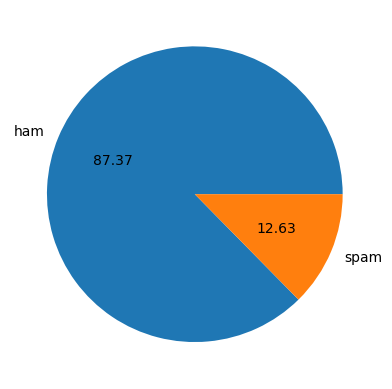

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [31]:
import nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sai
[nltk_data]     Sreeja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['num_characters']=df['text'].apply(len)

In [37]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
df['text'].apply(lamda x:nltk.word_tokenize(x))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2898122756.py, line 1)

In [39]:
!pip install nltk

In [47]:
import nltk
from nltk.tokenize import word_tokenize

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [48]:
df.head()

,target,text,num_characters,text_tokenized,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [50]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [51]:
df.head()

,target,text,num_characters,text_tokenized,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,2
1,0,Ok lar... Joking wif u oni...,29,8,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,2
3,0,U dun say so early hor... U c already then say...,49,13,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,1


In [54]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [55]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

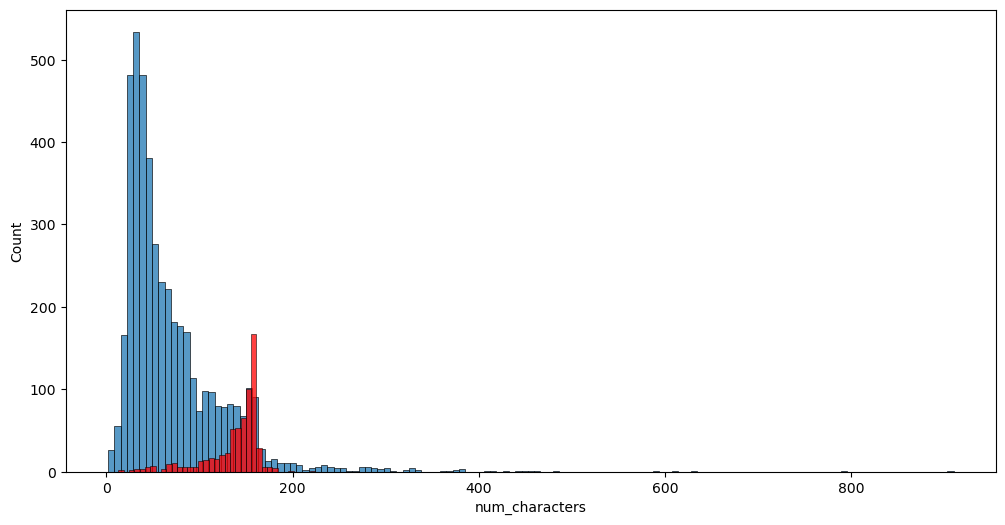

In [58]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

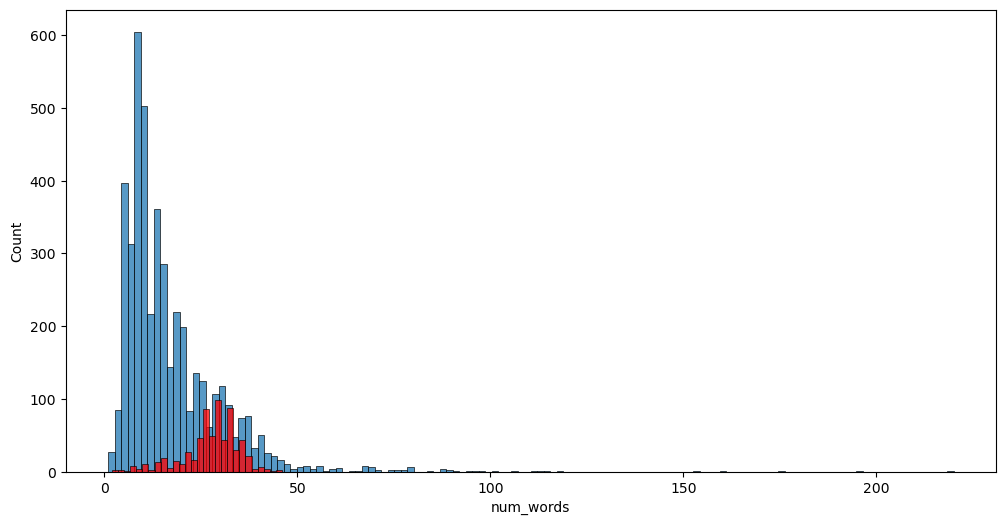

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

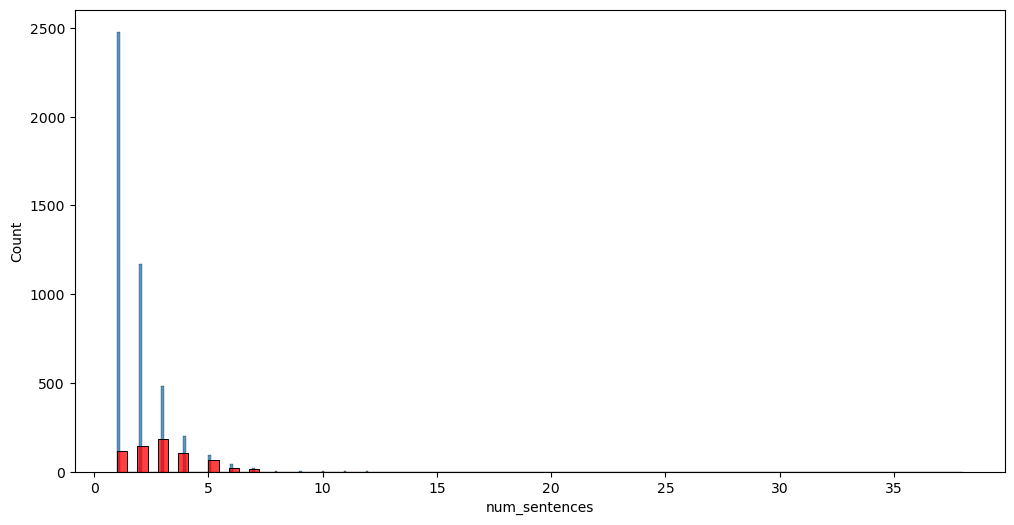

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

C:\Users\Sai Sreeja\anaconda32\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


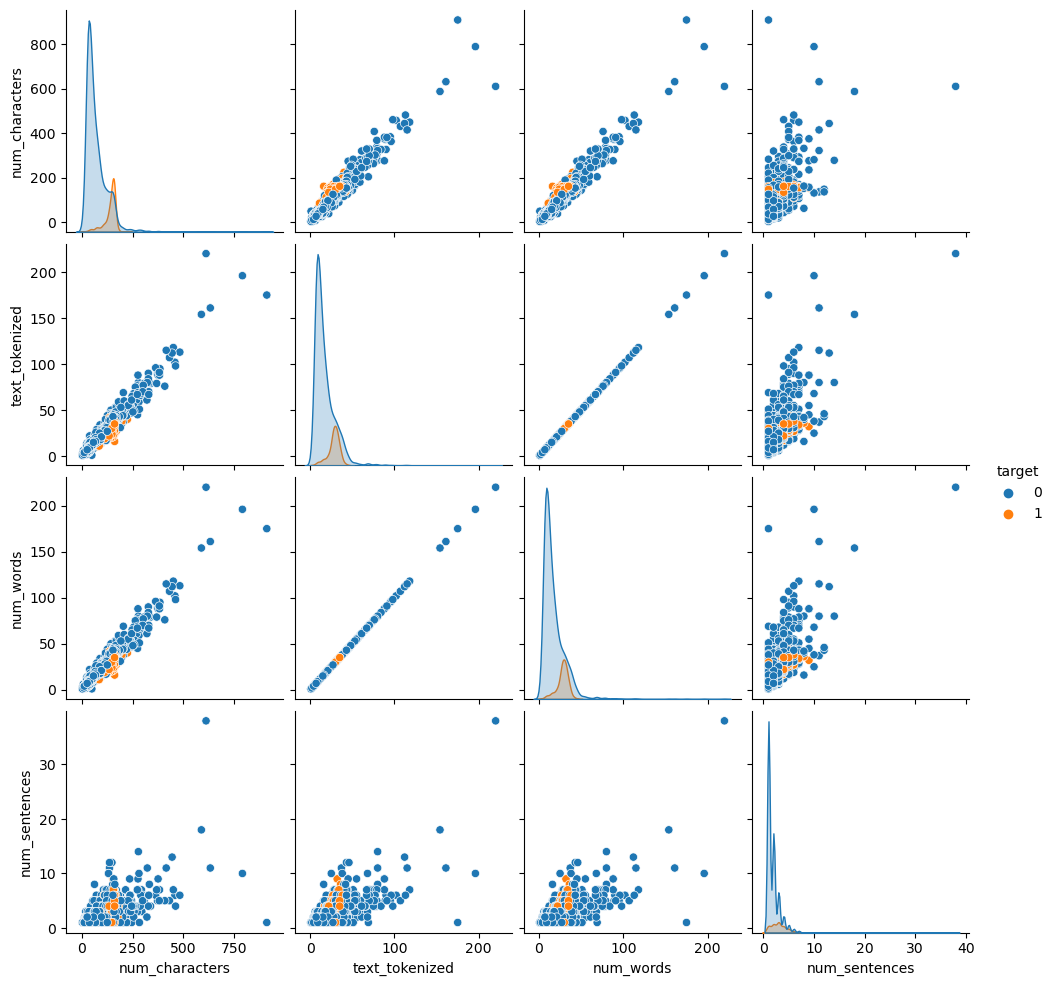

In [61]:
sns.pairplot(df,hue='target')

<Axes: >

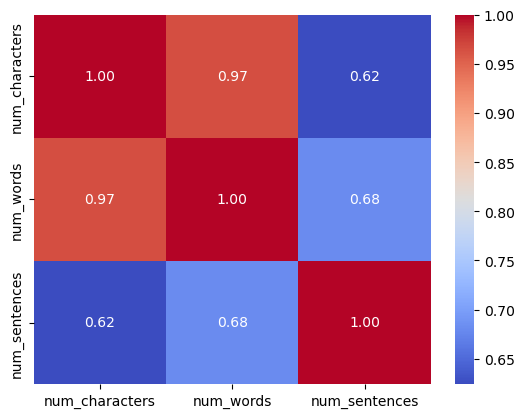

In [24]:
import seaborn as sns

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


In [72]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    return y

In [76]:
transform_text('SREEJA HEY HI %%')

['sreeja', 'hey', 'hi', '%', '%']

In [78]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))
plt.imshow(spam_wc)

ModuleNotFoundError: No module named 'wordcloud'

In [77]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))
plt.imshow(spam_wc)

NameError: name 'wc' is not defined

In [79]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:

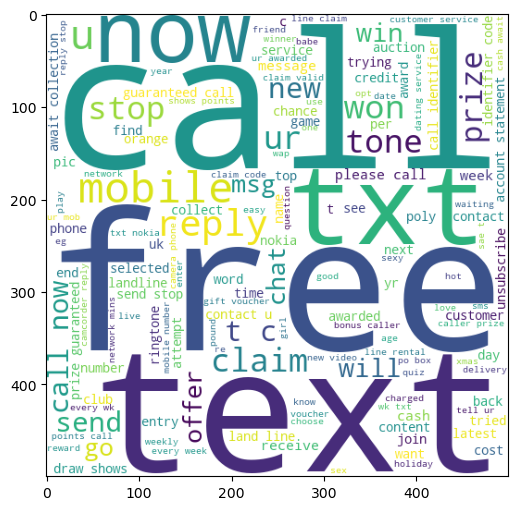

In [84]:
# Assuming you have a function transform_text that creates 'transformed_text' column
def transform_text(text):
    # Your text transformation logic here
    transformed_text = " ".join([token.lower() for token in nltk.word_tokenize(text) if token.isalpha()])
    return transformed_text

# Apply the transformation to create 'transformed_text' column
df['transformed_text'] = df['text'].apply(transform_text)

# Now you can generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

# Display the word cloud
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()


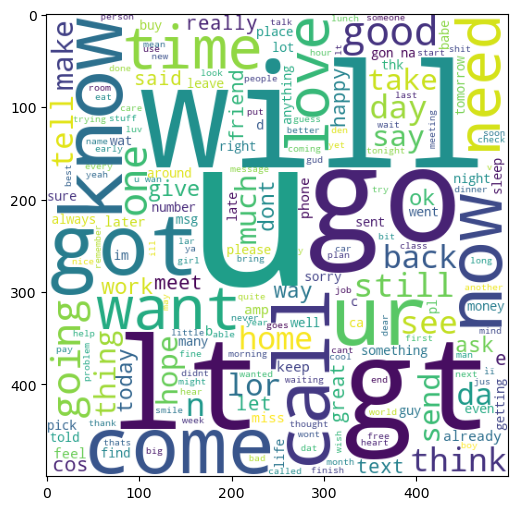

In [87]:
# Assuming you have a function transform_text that creates 'transformed_text' column
def transform_text(text):
    # Your text transformation logic here
    transformed_text = " ".join([token.lower() for token in nltk.word_tokenize(text) if token.isalpha()])
    return transformed_text

# Apply the transformation to create 'transformed_text' column
df['transformed_text'] = df['text'].apply(transform_text)

# Now you can generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))

# Display the word cloud
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [88]:
df.head()

,target,text,num_characters,text_tokenized,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,2,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,2,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,49,13,13,1,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,1,nah i do think he goes to usf he lives around ...


In [89]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        


In [90]:
len(spam_corpus)

12710

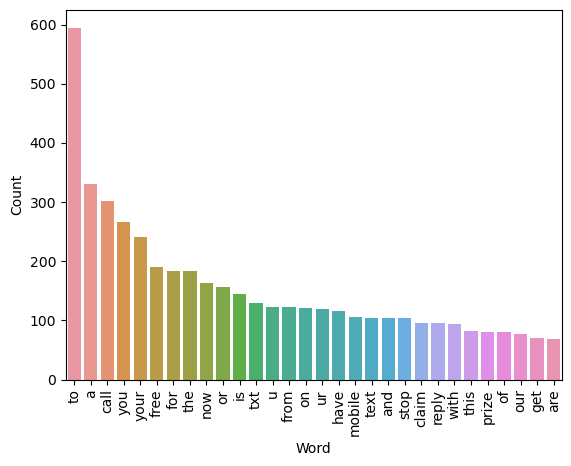

In [93]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a variable spam_corpus containing the text data
# Adjust the variable name based on your actual data
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
# Create a DataFrame from Counter's most_common result
counter_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(x='Word', y='Count', data=counter_df)
plt.xticks(rotation='vertical')
plt.show()


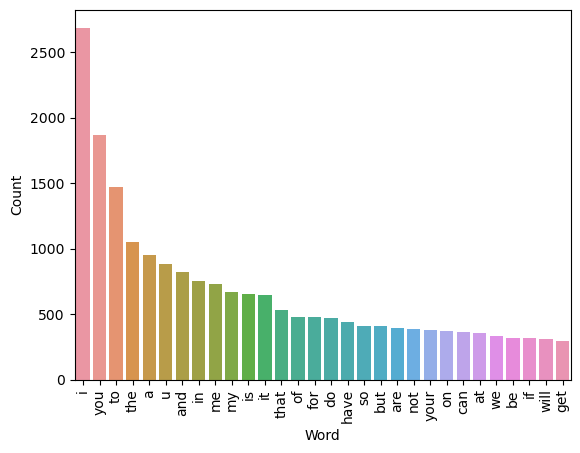

In [18]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a variable spam_corpus containing the text data
# Adjust the variable name based on your actual data
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
# Create a DataFrame from Counter's most_common result
counter_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(x='Word', y='Count', data=counter_df)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

KeyError: 'transformed_text'

In [23]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

# Read the CSV file
df = pd.read_csv(r"C:\Users\Sai Sreeja\Desktop\Email\spam.csv", encoding='ISO-8859-1')
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df['target'] = encode.fit_transform(df['target'])
df=df.drop_duplicates(keep='first')
df['num_characters']=df['text'].apply(len)
from nltk.tokenize import word_tokenize

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Define the text transformation function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = [i for i in text if i.isalnum()]
    return ' '.join(y)

# Apply the transformation to create the 'transformed_text' column
df['transformed_text'] = df['text'].apply(transform_text)

# Now you can use 'transformed_text' for TF-IDF transformation
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [24]:
X.shape

(5169, 8126)

In [3]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [25]:
y = df['target'].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [29]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [30]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9003868471953579
[[818  78]
 [ 25 113]]
0.5916230366492147


In [31]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9448742746615088
[[896   0]
 [ 57  81]]
1.0


In [32]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [31]:
!pip install xgboost

In [33]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [14]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [34]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [16]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9700193423597679, 0.9421487603305785)

In [35]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  KN
Accuracy -  0.902321083172147
Precision -  1.0
For  NB
Accuracy -  0.9448742746615088
Precision -  1.0
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8571428571428571
For  LR
Accuracy -  0.9506769825918762
Precision -  0.9393939393939394
For  RF
Accuracy -  0.965183752417795
Precision -  1.0
For  AdaBoost
Accuracy -  0.9758220502901354
Precision -  0.937984496124031
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.912
For  ETC
Accuracy -  0.9709864603481625
Precision -  0.9821428571428571
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9019607843137255
For  xgb
Accuracy -  0.9816247582205029
Precision -  0.983739837398374


In [36]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [19]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values

In [37]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.902321,1.000000
2,NB,0.944874,1.000000
5,RF,0.965184,1.000000
10,xgb,0.981625,0.983740
8,ETC,0.970986,0.982143
0,SVC,0.978723,0.975410
4,LR,0.950677,0.939394
6,AdaBoost,0.975822,0.937984
7,BgC,0.966151,0.912000
9,GBDT,0.945841,0.901961


In [38]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [39]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.902321
1,NB,Accuracy,0.944874
2,RF,Accuracy,0.965184
3,xgb,Accuracy,0.981625
4,ETC,Accuracy,0.970986
5,SVC,Accuracy,0.978723
6,LR,Accuracy,0.950677
7,AdaBoost,Accuracy,0.975822
8,BgC,Accuracy,0.966151
9,GBDT,Accuracy,0.945841


C:\Users\Sai Sreeja\anaconda32\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


NameError: name 'plt' is not defined

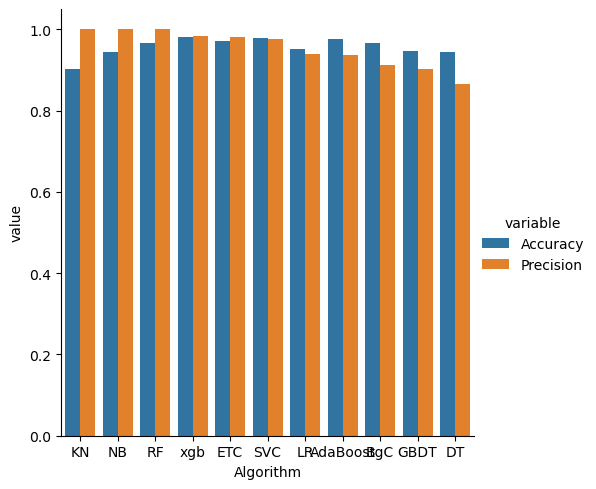

In [25]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [40]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [41]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.902321,1.000000,0.902321,1.000000
1,NB,0.944874,1.000000,0.944874,1.000000
2,RF,0.965184,1.000000,0.965184,1.000000
3,xgb,0.981625,0.983740,0.981625,0.983740
4,ETC,0.970986,0.982143,0.970986,0.982143
5,SVC,0.978723,0.975410,0.978723,0.975410
6,LR,0.950677,0.939394,0.950677,0.939394
7,AdaBoost,0.975822,0.937984,0.975822,0.937984
8,BgC,0.966151,0.912000,0.966151,0.912000
9,GBDT,0.945841,0.901961,0.945841,0.901961


In [42]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))